<div class="alert alert-block alert-success">
    <h1 style = "font-size : 15pt" align = "center">Importing essential libraries and packages</h1>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.utils.class_weight import compute_class_weight
import warnings

In [2]:
plt.style.use("ggplot")

In [3]:
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">
    <h1 style = "font-size : 15pt" align = "center">Reading the data</h1>
</div>

In [4]:
data = pd.read_excel(r"dry+bean+dataset\DryBeanDataset\Dry_Bean_Dataset.xlsx")

In [5]:
data.sample(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
12673,35350,693.587,254.677713,177.242648,1.436887,0.718091,35773,212.153289,0.741557,0.988175,0.923416,0.833027,0.007204,0.002140,0.693933,0.997104,DERMASON
13050,37401,718.286,272.915291,174.902197,1.560388,0.767653,37686,218.221063,0.699032,0.992438,0.910958,0.799593,0.007297,0.001840,0.639348,0.997632,DERMASON
11602,31012,654.663,251.573455,157.413757,1.598167,0.780050,31404,198.710102,0.718070,0.987518,0.909293,0.789869,0.008112,0.001948,0.623893,0.997085,DERMASON
7413,71764,1081.163,444.491650,206.644999,2.150992,0.885362,72632,302.279279,0.820010,0.988049,0.771497,0.680056,0.006194,0.000817,0.462476,0.994783,HOROZ
12866,36269,713.039,264.050065,175.196400,1.507166,0.748179,36751,214.893288,0.777704,0.986885,0.896435,0.813835,0.007280,0.001970,0.662328,0.998238,DERMASON


<div class="alert alert-block alert-success">
    <h1 style = "font-size : 15pt" align = "center">Exploratory Data Analysis</h1>
</div>

In [6]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Checking the null values of each column</h1>
</div>

In [8]:
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Checking for the duplicated values and dropping them</h1>
</div>

In [9]:
data.duplicated().sum()

68

In [10]:
data.drop_duplicates(inplace = True)

In [11]:
data.duplicated().sum()

0

<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Checking the distribution of classes</h1>
</div>

In [12]:
data.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

<div class="alert alert-block alert-info">
    <h1 style = "font-size : 15pt" align = "center">Tip💡: The data we are working with is imbalanced!</h1>
</div>

In [13]:
dist = data.Class.value_counts(normalize = True) * 100

In [14]:
for idx, per in zip(dist.index, dist.values):
    s = f"{idx}" + " " * (9 - len(idx)) + ": " + str(round(per, 2)) +  "%"
    print(s)

DERMASON : 26.18%
SIRA     : 19.46%
SEKER    : 14.97%
HOROZ    : 13.73%
CALI     : 12.04%
BARBUNYA : 9.76%
BOMBAY   : 3.85%


<div class="alert alert-block alert-info">
    <h1 style = "font-size : 15pt" align = "center">Tip💡: As you see, we should give more weight to classes BARBUNYA and BOMBAY👆</h1>
</div>

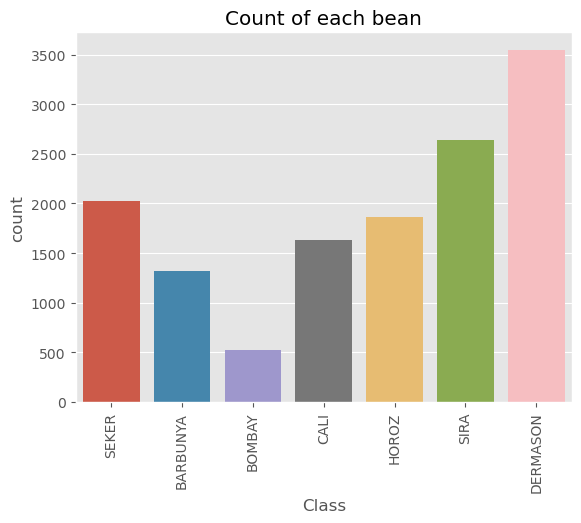

In [15]:
sns.countplot(data, x = "Class")
plt.xticks(rotation = 90)
plt.title("Count of each bean")
plt.show()

<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Checking the distribution of numerical features</h1>
</div>

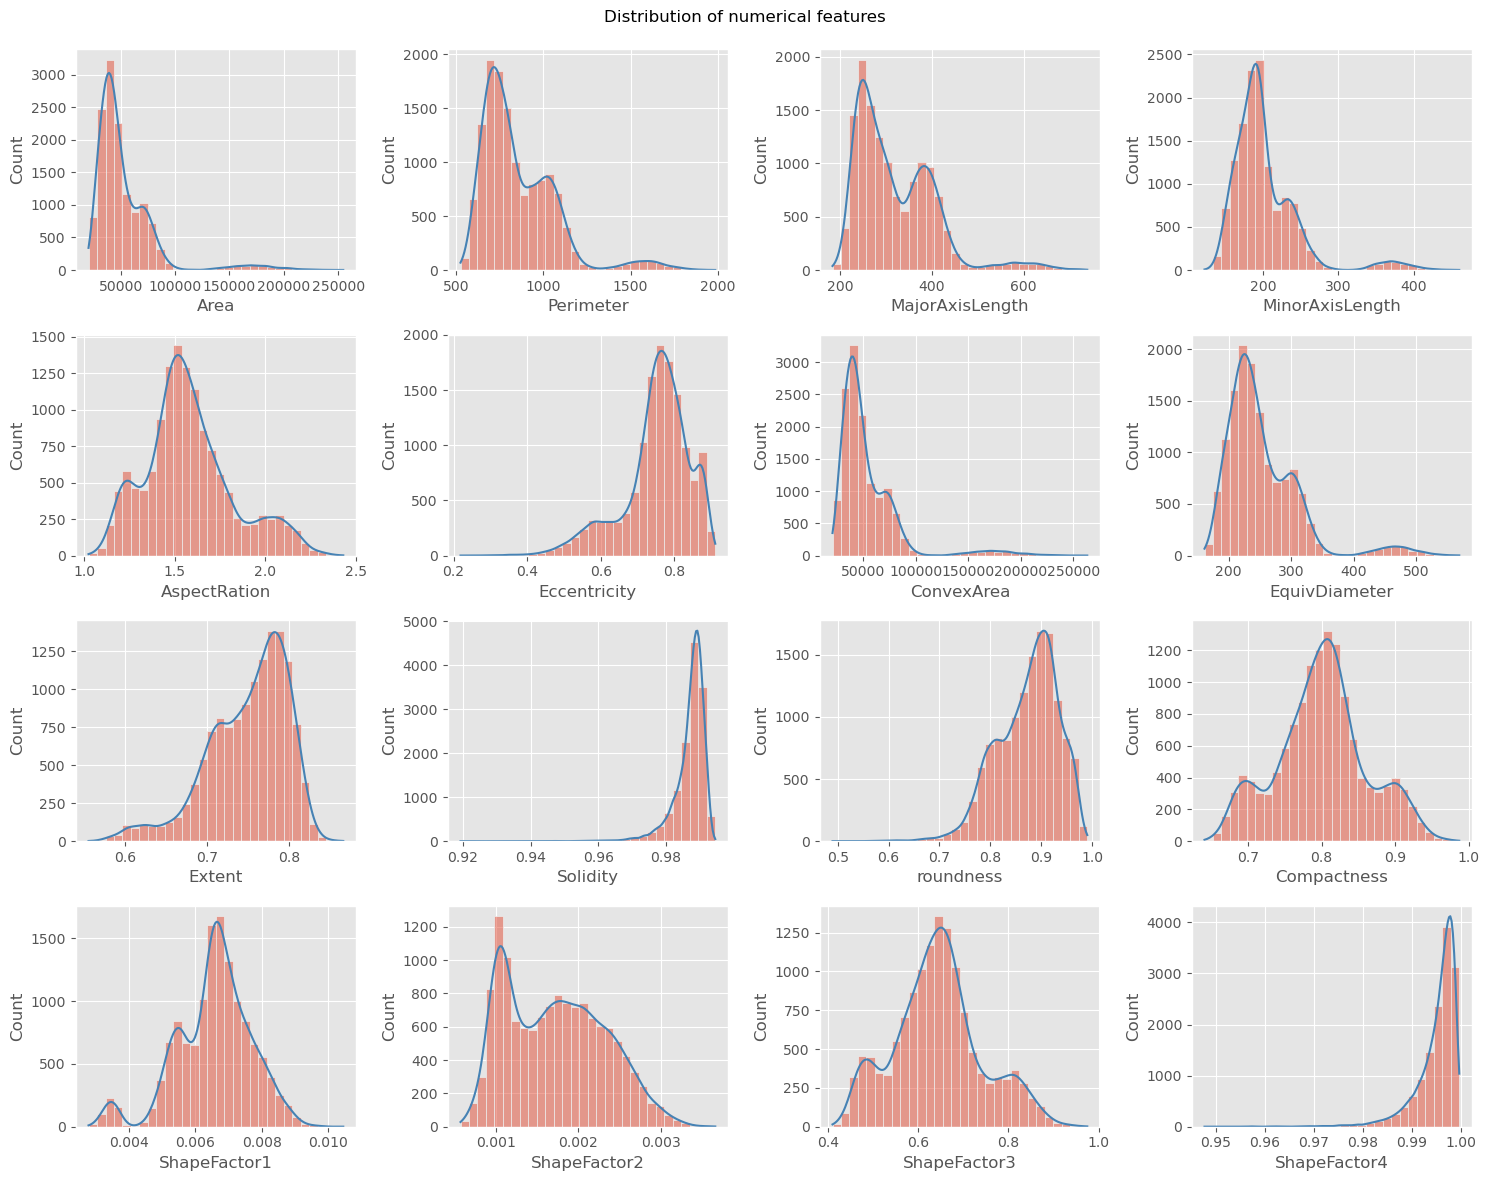

In [18]:
cols = data.drop('Class', axis = 1).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
fig.suptitle("Distribution of numerical features\n")
for variable, subplot in zip(cols, ax.flatten()):
    g = sns.histplot(data[variable], bins = 30, kde = True, ax=subplot)
    g.lines[0].set_color('steelblue')
plt.tight_layout()

<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Pearson Correlation between features</h1>
</div>

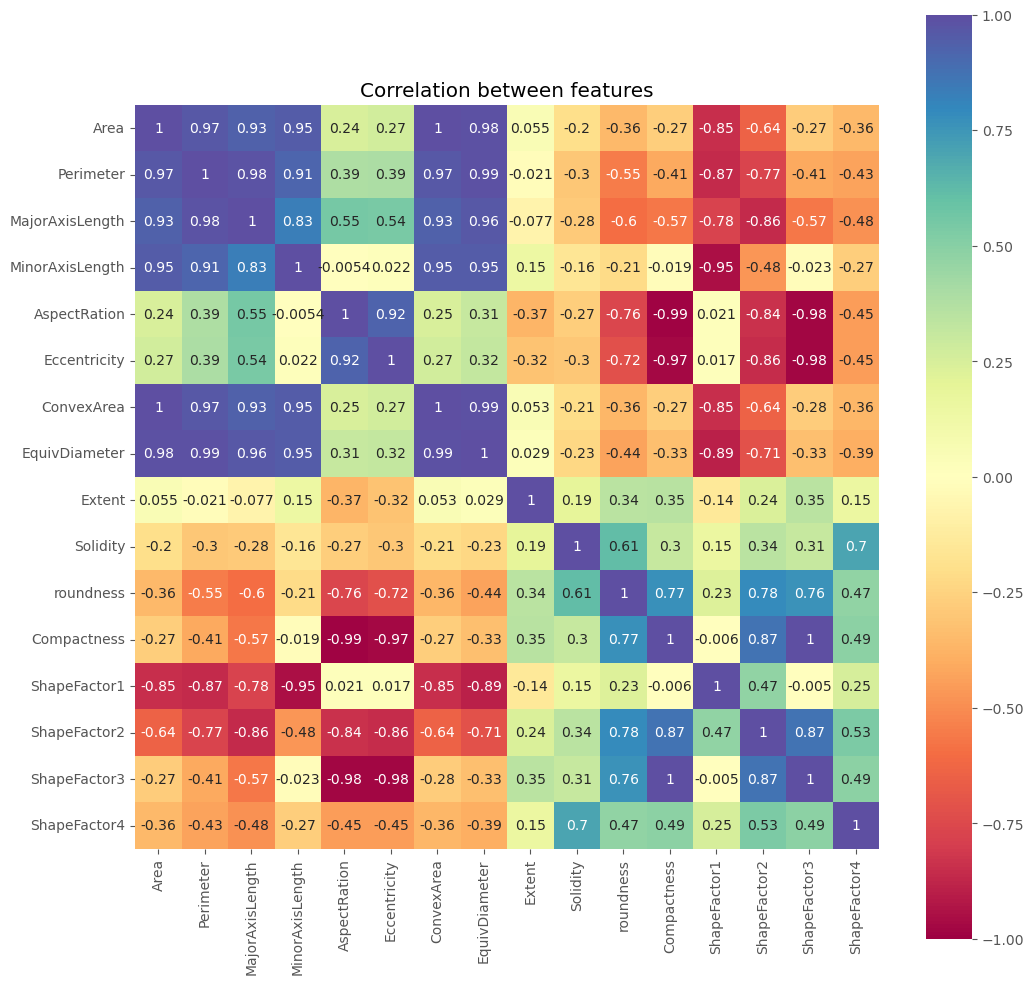

In [19]:
plt.figure(figsize = (12, 12))
sns.heatmap(data.corr('pearson'), cmap = "Spectral", vmin = -1, vmax = 1, square = True, annot = True)
plt.title("Correlation between features")
plt.show()

<div class="alert alert-block alert-info">
    <h1 style = "font-size : 15pt" align = "center">Tip💡: There are lots of highly correlated features</h1>
</div>

<div class="alert alert-block alert-success">
    <h1 style = "font-size : 15pt" align = "center">Encoding the labels</h1>
</div>

In [20]:
LE = LabelEncoder()
y = LE.fit_transform(data["Class"])

<div class="alert alert-block alert-success">
    <h1 style = "font-size : 15pt" align = "center">Splitting data into X and y</h1>
</div>

In [21]:
X = data.drop("Class", axis = 1)

<div class="alert alert-block alert-success">
    <h1 style = "font-size : 15pt" align = "center">Computing the class weights</h1>
</div>

In [22]:
class_weight = dict(zip(np.unique(y), compute_class_weight(class_weight="balanced", classes = np.unique(y), y = y)))

In [23]:
class_weight

{0: 1.4634752539442404,
 1: 3.7063492063492065,
 2: 1.1869412795793164,
 3: 0.5456047055031826,
 4: 1.0401689708141322,
 5: 0.9544717739093664,
 6: 0.733958378495556}

<div class="alert alert-block alert-success">
    <h1 style = "font-size : 15pt" align = "center">Selecting the 5 best features</h1>
</div>

In [24]:
Xnew = SelectKBest(chi2, k = 5).fit_transform(X, y)

In [25]:
Xnew[:5]

array([[28395.        ,   610.291     ,   208.17811671, 28715.        ,
          190.14109727],
       [28734.        ,   638.018     ,   200.52479566, 29172.        ,
          191.27275049],
       [29380.        ,   624.11      ,   212.82612986, 29690.        ,
          193.4109041 ],
       [30008.        ,   645.884     ,   210.55799896, 30724.        ,
          195.46706182],
       [30140.        ,   620.134     ,   201.84788217, 30417.        ,
          195.89650298]])

<div class="alert alert-block alert-success">
    <h1 style = "font-size : 15pt" align = "center">Splitting data into train and test</h1>
</div>

In [26]:
Xtr, Xte, Ytr, Yte = train_test_split(Xnew, y, stratify = y, random_state = 42)

<div class="alert alert-block alert-success">
    <h1 style = "font-size : 15pt" align = "center">Creating different pipelines [Logistic Regression]</h1>
</div>

In [27]:
log_pipe = make_pipeline(StandardScaler(),
                       LogisticRegression(multi_class = "multinomial", class_weight = class_weight))
grid_log = GridSearchCV(log_pipe,
                param_grid = {
                              "logisticregression__C" : [0.1, 0.5, 0.9],
                              "logisticregression__penalty" : ["l1", "l2"], 
                              "logisticregression__solver" : ["liblinear", "saga", "lbfgs"]
                             },
            cv = StratifiedKFold(5))
log_pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight={0: 1.4634752539442404,
                                                  1: 3.7063492063492065,
                                                  2: 1.1869412795793164,
                                                  3: 0.5456047055031826,
                                                  4: 1.0401689708141322,
                                                  5: 0.9544717739093664,
                                                  6: 0.733958378495556},
                                    multi_class='multinomial'))])

In [28]:
grid_log.fit(Xtr, Ytr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(class_weight={0: 1.4634752539442404,
                                                                         1: 3.7063492063492065,
                                                                         2: 1.1869412795793164,
                                                                         3: 0.5456047055031826,
                                                                         4: 1.0401689708141322,
                                                                         5: 0.9544717739093664,
                                                                         6: 0.733958378495556},
                                                           multi_class='multinomial'))]),
             param_grid={'logisticregression__C': [0.1, 0.5, 0.9],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'saga',
                                                        'lbfgs']})

In [29]:
grid_log.best_score_ * 100

90.6467325354641

In [30]:
grid_log.best_params_

{'logisticregression__C': 0.9,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'saga'}

In [31]:
log_model = grid_log.best_estimator_

In [32]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [33]:
logreg_pred = log_model.predict(Xte)

In [34]:
print("Test Accuracy [LogisticRegression]:", accuracy_score(Yte, logreg_pred) * 100,"%")
print("Test F1 score [LogisticRegression]:", f1_score(Yte, logreg_pred, average = "macro"))
print("Test Recall score [LogisticRegression]:", recall_score(Yte, logreg_pred, average = "macro"))
print("Test Precision score [LogisticRegression]:", precision_score(Yte, logreg_pred, average = "macro"))

Test Accuracy [LogisticRegression]: 90.37212049616066 %
Test F1 score [LogisticRegression]: 0.9172305059633573
Test Recall score [LogisticRegression]: 0.9188445167248892
Test Precision score [LogisticRegression]: 0.9165711083445341


<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Confusion Matrix [Logistic Regression]</h1>
</div>

In [35]:
Yte_new = LE.inverse_transform(Yte)
logreg_pred_labels = LE.inverse_transform(logreg_pred)

In [36]:
labels = np.unique(LE.inverse_transform(y))

In [37]:
cm_log = confusion_matrix(Yte_new, logreg_pred_labels, labels = labels)
cm_log

array([[289,   0,  25,   0,   1,   7,   8],
       [  0, 130,   0,   0,   0,   0,   0],
       [ 18,   0, 378,   0,   7,   2,   3],
       [  0,   0,   0, 766,   0,  25,  96],
       [  4,   0,   9,   6, 439,   0,   7],
       [  8,   0,   1,   6,   0, 476,  16],
       [  3,   0,   2,  40,  14,  18, 582]], dtype=int64)

<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Calculating metrics from confusion matrix for each class [LogisticRegression]</h1>
</div>

In [172]:
FP_log = cm_log.sum(axis = 0) - np.diag(cm_log)  
FN_log = cm_log.sum(axis = 1) - np.diag(cm_log)
TP_log = np.diag(cm_log)
TN_log = cm_log.sum() - (FP_log + FN_log + TP_log)

In [173]:
FP_log

array([ 33,   0,  37,  52,  22,  52, 130], dtype=int64)

In [174]:
FN_log

array([ 41,   0,  30, 121,  26,  31,  77], dtype=int64)

In [175]:
TP_log

array([289, 130, 378, 766, 439, 476, 582], dtype=int64)

In [176]:
TN_log

array([3023, 3256, 2941, 2447, 2899, 2827, 2597], dtype=int64)

<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Displaying confusion matrix [Logistic Regression]</h1>
</div>

In [130]:
percent_log = [f"{round(value * 100, 2)}%" for value in cm_log.flatten() / cm_log.sum()]
annot_log = [f"{cnt}\n{per}" for cnt, per in zip(cm_log.flatten(), percent_log)]

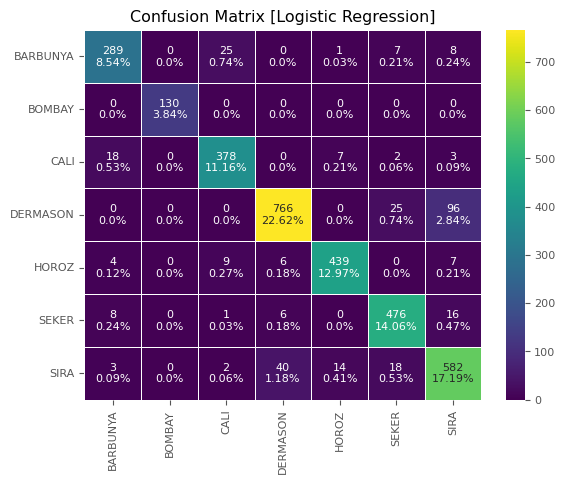

In [131]:
plt.rcParams.update({"font.size" : 8})
plt.title("Confusion Matrix [Logistic Regression]")
sns.heatmap(cm_log, annot = np.array(annot_log).reshape(7, 7), xticklabels = labels, yticklabels = labels, fmt = "", cmap = "viridis", linewidth = 0.5)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Classification Report [Logistic Regression]</h1>
</div>

In [132]:
print(classification_report(Yte_new, logreg_pred_labels, labels = labels))

              precision    recall  f1-score   support

    BARBUNYA       0.90      0.88      0.89       330
      BOMBAY       1.00      1.00      1.00       130
        CALI       0.91      0.93      0.92       408
    DERMASON       0.94      0.86      0.90       887
       HOROZ       0.95      0.94      0.95       465
       SEKER       0.90      0.94      0.92       507
        SIRA       0.82      0.88      0.85       659

    accuracy                           0.90      3386
   macro avg       0.92      0.92      0.92      3386
weighted avg       0.91      0.90      0.90      3386



<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Now lets calculate the metrics by hand and check them with the classification_report values <br><br>[LogisticRegression]</h1>
</div>

In [133]:
Precision_log = TP_log / (TP_log + FP_log)
Precision_log

array([0.89751553, 1.        , 0.91084337, 0.93643032, 0.95227766,
       0.90151515, 0.81741573])

In [134]:
Recall_log = TP_log / (TP_log + FN_log)
Recall_log

array([0.87575758, 1.        , 0.92647059, 0.86358512, 0.94408602,
       0.93885602, 0.8831563 ])

In [135]:
F1_score_log = 2 * (Recall_log * Precision_log) / (Recall_log + Precision_log)
F1_score_log

array([0.88650307, 1.        , 0.91859052, 0.89853372, 0.94816415,
       0.91980676, 0.84901532])

In [136]:
Specificity_log = TN_log / (FP_log + TN_log)
Specificity_log

array([0.98920157, 1.        , 0.98757555, 0.97919168, 0.99246833,
       0.98193817, 0.95232857])

<div class="alert alert-block alert-success">
    <h1 style = "font-size : 15pt" align = "center">Creating different pipelines [SVC]</h1>
</div>

In [137]:
svm_pipe = make_pipeline(StandardScaler(),
                         SVC(class_weight = class_weight, probability = True))

grid_svm = GridSearchCV(svm_pipe,
                param_grid = [{
                              "svc__C" : [1, 10, 100],
                              "svc__kernel" : ["rbf"], 
                              "svc__gamma" : [0.1, 0.8]
                             },
                             {
                              "svc__C" : [1, 10, 100],
                              "svc__kernel" : ["poly"],
                              "svc__degree" : [2, 3],
                             }],
            cv = StratifiedKFold(5))
svm_pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(class_weight={0: 1.4634752539442404, 1: 3.7063492063492065,
                                   2: 1.1869412795793164, 3: 0.5456047055031826,
                                   4: 1.0401689708141322, 5: 0.9544717739093664,
                                   6: 0.733958378495556},
                     probability=True))])

In [138]:
grid_svm.fit(Xtr, Ytr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc',
                                        SVC(class_weight={0: 1.4634752539442404,
                                                          1: 3.7063492063492065,
                                                          2: 1.1869412795793164,
                                                          3: 0.5456047055031826,
                                                          4: 1.0401689708141322,
                                                          5: 0.9544717739093664,
                                                          6: 0.733958378495556},
                                            probability=True))]),
             param_grid=[{'svc__C': [1, 10, 100], 'svc__gamma': [0.1, 0.8],
                          'svc__kernel': ['rbf']},
                         {'svc__C': [1, 10, 100], 'svc__degree': [2, 3],
                          'svc__kernel': ['poly']}])

In [139]:
grid_svm.best_score_ * 100

91.92663809379809

In [140]:
grid_svm.best_params_

{'svc__C': 100, 'svc__gamma': 0.8, 'svc__kernel': 'rbf'}

In [141]:
model_svm = grid_svm.best_estimator_
model_svm

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=100,
                     class_weight={0: 1.4634752539442404, 1: 3.7063492063492065,
                                   2: 1.1869412795793164, 3: 0.5456047055031826,
                                   4: 1.0401689708141322, 5: 0.9544717739093664,
                                   6: 0.733958378495556},
                     gamma=0.8, probability=True))])

In [142]:
svm_pred = model_svm.predict(Xte)

In [143]:
print("Test Accuracy [SVC]:", model_svm.score(Xte, Yte)*100,"%")
print("Test F1 score [SVC]:", f1_score(Yte, svm_pred, average = "macro"))
print("Test Recall score [SVC]:", recall_score(Yte, svm_pred, average = "macro"))
print("Test Precision score [SVC]:", precision_score(Yte, svm_pred, average = "macro"))

Test Accuracy [SVC]: 91.37625516834022 %
Test F1 score [SVC]: 0.9254848446977624
Test Recall score [SVC]: 0.9251677708345981
Test Precision score [SVC]: 0.9259876396888919


<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Confusion Matrix [SVC]</h1>
</div>

In [144]:
svm_pred_labels = LE.inverse_transform(svm_pred)

In [145]:
cm_svm = confusion_matrix(Yte_new, svm_pred_labels, labels = labels)
cm_svm

array([[291,   0,  26,   0,   1,   7,   5],
       [  0, 130,   0,   0,   0,   0,   0],
       [ 14,   0, 382,   0,   6,   2,   4],
       [  0,   0,   0, 804,   1,  21,  61],
       [  5,   0,   9,   5, 438,   0,   8],
       [  5,   0,   0,   8,   0, 479,  15],
       [  5,   0,   0,  64,   8,  12, 570]], dtype=int64)

<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Calculating metrics from confusion matrix for each class [SVC]</h1>
</div>

In [177]:
FP_svm = cm_svm.sum(axis = 0) - np.diag(cm_svm)  
FN_svm = cm_svm.sum(axis = 1) - np.diag(cm_svm)
TP_svm = np.diag(cm_svm)
TN_svm = cm_svm.sum() - (FP_svm + FN_svm + TP_svm)

In [178]:
FP_svm

array([29,  0, 35, 77, 16, 42, 93], dtype=int64)

In [179]:
FN_svm

array([39,  0, 26, 83, 27, 28, 89], dtype=int64)

In [180]:
TP_svm

array([291, 130, 382, 804, 438, 479, 570], dtype=int64)

In [190]:
TN_svm

array([3027, 3256, 2943, 2422, 2905, 2837, 2634], dtype=int64)

<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Displaying confusion matrix [SVC]</h1>
</div>

In [191]:
percent_svm = [f"{round(value * 100, 2)}%" for value in cm_svm.flatten() / cm_svm.sum()]
annot_svm = [f"{cnt}\n{per}" for cnt, per in zip(cm_svm.flatten(), percent_svm)]

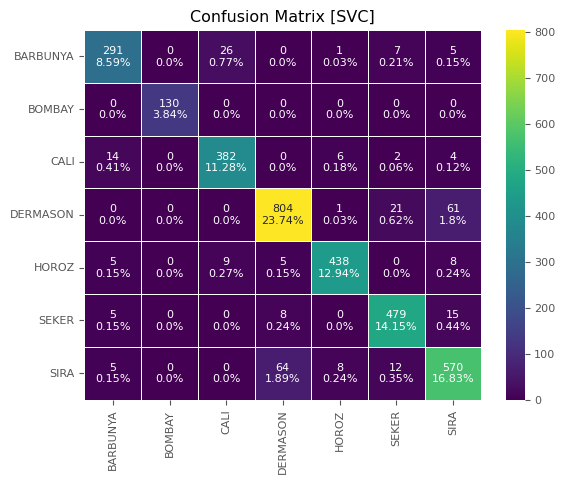

In [192]:
plt.rcParams.update({"font.size" : 8})
plt.title("Confusion Matrix [SVC]")
sns.heatmap(cm_svm, annot = np.array(annot_svm).reshape(7, 7), xticklabels = labels, yticklabels = labels, fmt = "", cmap = "viridis", linewidth = 0.5)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Classification Report [SVC]</h1>
</div>

In [184]:
print(classification_report(Yte_new, svm_pred_labels, labels = labels))

              precision    recall  f1-score   support

    BARBUNYA       0.91      0.88      0.90       330
      BOMBAY       1.00      1.00      1.00       130
        CALI       0.92      0.94      0.93       408
    DERMASON       0.91      0.91      0.91       887
       HOROZ       0.96      0.94      0.95       465
       SEKER       0.92      0.94      0.93       507
        SIRA       0.86      0.86      0.86       659

    accuracy                           0.91      3386
   macro avg       0.93      0.93      0.93      3386
weighted avg       0.91      0.91      0.91      3386



<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Now lets calculate the metrics by hand and check them with the classification_report values <br> <br>[SVC]</h1>
</div>

In [185]:
Precision_svm = TP_svm / (TP_svm + FP_svm)
Precision_svm

array([0.909375  , 1.        , 0.91606715, 0.91259932, 0.96475771,
       0.9193858 , 0.85972851])

In [186]:
Recall_svm = TP_svm / (TP_svm + FN_svm)
Recall_svm

array([0.88181818, 1.        , 0.93627451, 0.90642616, 0.94193548,
       0.94477318, 0.86494689])

In [187]:
F1_score_svm = 2 * (Recall_svm * Precision_svm) / (Recall_svm + Precision_svm)
F1_score_svm

array([0.89538462, 1.        , 0.92606061, 0.90950226, 0.95321001,
       0.93190661, 0.8623298 ])

In [188]:
Specificity_svm = TN_svm / (FP_svm + TN_svm)
Specificity_svm

array([0.99051047, 1.        , 0.98824715, 0.96918768, 0.99452242,
       0.9854116 , 0.96589659])

<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Displaying the ROC Curve of each class [LogisticRegression]</h1>
</div>

In [159]:
prob_log = log_model.predict_proba(Xte)

In [160]:
labels

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [161]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelBinarizer

In [162]:
label_binarizer = LabelBinarizer().fit(LE.inverse_transform(Ytr))
y_onehot_test = label_binarizer.transform(LE.inverse_transform(Yte))

In [163]:
label_dic = dict(zip(LE.fit_transform(LE.classes_), LE.classes_))
label_dic

{0: 'BARBUNYA',
 1: 'BOMBAY',
 2: 'CALI',
 3: 'DERMASON',
 4: 'HOROZ',
 5: 'SEKER',
 6: 'SIRA'}

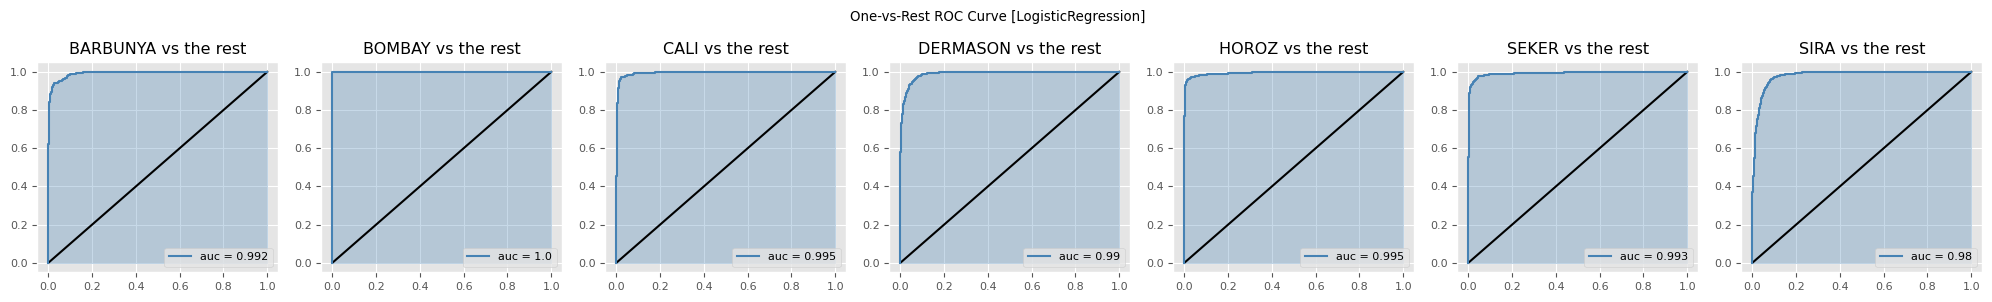

In [164]:
fig = plt.figure(figsize = (20, 3))
axes = fig.subplots(nrows = 1, ncols = len(labels))
fig.suptitle("One-vs-Rest ROC Curve [LogisticRegression]")
auc_list_log = []
for row, cls in zip(axes, np.unique(y)):
    class_of_interest = label_dic[cls]
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    fpr_log, tpr_log, _ = roc_curve(y_onehot_test[:, class_id], prob_log[:, class_id])
    auc_log = np.trapz(tpr_log, fpr_log)
    auc_list_log.append(auc_log)
    row.plot([0, 1], [0, 1], c = "black")
    row.fill_between(fpr_log, tpr_log, color = "steelblue", alpha = 0.3)
    row.plot(fpr_log, tpr_log, label = f"auc = {round(auc_log, 3)}", c = "steelblue")
    row.set_title(f"{class_of_interest} vs the rest")
    row.legend()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <h1 style = "font-size : 10pt" align = "center">Tip💡: Logistic Regression works perfectly for the class BOMBAY (auc = 1) Because of the higher class weight we passed to it</h1>
</div>

<div class="alert alert-block alert-warning">
    <h1 style = "font-size : 15pt" align = "center">Displaying the ROC Curve for each class [SVC]</h1>
</div>

In [165]:
prob_svm = model_svm.predict_proba(Xte)

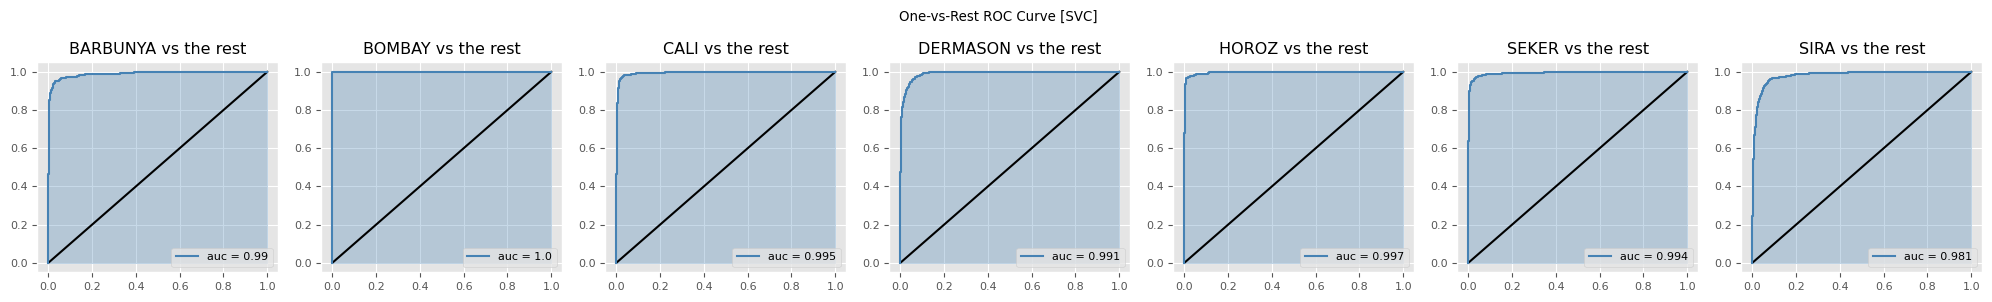

In [166]:
fig = plt.figure(figsize = (20, 3))
axes = fig.subplots(nrows = 1, ncols = len(labels))
fig.suptitle("One-vs-Rest ROC Curve [SVC]")
auc_list_svm = []

for row, cls in zip(axes, np.unique(y)):
    class_of_interest = label_dic[cls]
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    fpr_svm, tpr_svm, _ = roc_curve(y_onehot_test[:, class_id], prob_svm[:, class_id])
    auc_svm = np.trapz(tpr_svm, fpr_svm)
    auc_list_svm.append(auc_svm)
    row.plot([0, 1], [0, 1], c = "black")
    row.fill_between(fpr_svm, tpr_svm, color = "steelblue", alpha = 0.3)
    row.plot(fpr_svm, tpr_svm, label = f"auc = {round(auc_svm, 3)}", c = "steelblue")
    row.set_title(f"{class_of_interest} vs the rest")
    row.legend()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <h1 style = "font-size : 10pt" align = "center">Tip💡: SVC works perfectly for the class BOMBAY (auc = 1) Because of the higher class weight we passed to it</h1>
</div>

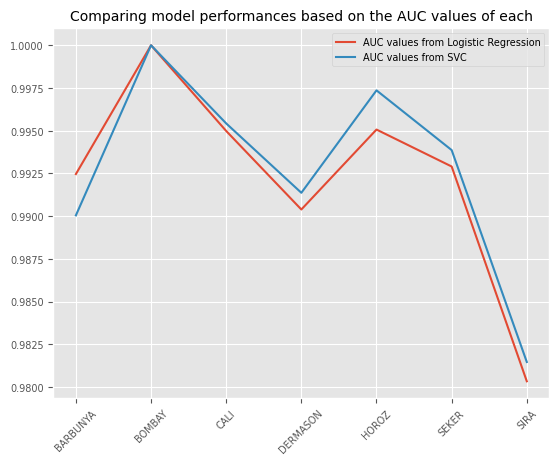

In [167]:
plt.rcParams.update({'font.size': 7})
plt.plot(list(label_dic.values()), auc_list_log, label = "AUC values from Logistic Regression")
plt.plot(list(label_dic.values()), auc_list_svm, label = "AUC values from SVC")
plt.legend()
plt.title("Comparing model performances based on the AUC values of each")
plt.xticks(rotation = 45)
plt.show()

<div class="alert alert-block alert-info">
    <h1 style = "font-size : 10pt" align = "center">Tip💡: We can notice that SVC has had a better overall performance than Logistic Regression.</h1>
</div>

<div class="alert alert-block alert-success">
    <h1 style = "font-size : 15pt" align = "center">Putting it all together...</h1>
    <p style = "text-align:center">Now we are going to compare these two models and save the best for further uses</p>
</div>

In [168]:
for model in [log_model, model_svm]:
    print(model[-1].__class__.__name__ + " " * (18 - len(model[-1].__class__.__name__)) + ":", f1_score(Yte, model.predict(Xte), average = "macro"))

LogisticRegression: 0.9172305059633573
SVC               : 0.9254848446977624


<div class="alert alert-block alert-info">
    <h1 style = "font-size : 15pt" align = "center">So the best model based on F1 Score is SVC 👆</h1>
</div>

<div class="alert alert-block alert-info">
    <h1 style = "font-size : 15pt" align = "center">Tip💡: We can save the best model for further uses using the "joblib" library</h1>
</div>

In [169]:
import joblib

In [170]:
best_model = joblib.dump(model_svm, "SVM.pkl")

In [171]:
joblib.load("SVM.pkl")

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=100,
                     class_weight={0: 1.4634752539442404, 1: 3.7063492063492065,
                                   2: 1.1869412795793164, 3: 0.5456047055031826,
                                   4: 1.0401689708141322, 5: 0.9544717739093664,
                                   6: 0.733958378495556},
                     gamma=0.8, probability=True))])